In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [27]:
from google.colab import files
uploaded = files.upload()

# Baca nama file
file_name = next(iter(uploaded))
image = cv2.imread(file_name)
if image is None:
    raise Exception("Gambar tidak terbaca.")

# Konversi ke HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

color_ranges = {
    "red": [
        ([0, 70, 50], [10, 255, 255]),
        ([160, 70, 50], [180, 255, 255])
    ],
    "green": [
        ([40, 40, 40], [85, 255, 255])
    ],
    "blue": [
        ([90, 40, 40], [130, 255, 255])
    ],
    "yellow": [
        ([20, 100, 100], [40, 255, 255])
    ],
    "purple": [
        ([130, 50, 50], [160, 255, 255])
    ]
}

# Warna BGR untuk menggambar kotak dan teks
draw_colors = {
    "red": (0, 0, 255),
    "green": (0, 255, 0),
    "blue": (255, 0, 0),
    "yellow": (0, 255, 255),
    "purple": (255, 0, 255)
}

Saving unnamed.png to unnamed.png


In [28]:
# Input interaktif
valid_colors = list(color_ranges.keys())
while True:
    chosen_color = input(f"Masukkan warna yang ingin dideteksi {valid_colors}: ").lower()
    if chosen_color in valid_colors:
        break
    print(f"Warna '{chosen_color}' tidak dikenali. Coba salah satu dari: {valid_colors}")


Masukkan warna yang ingin dideteksi ['red', 'green', 'blue', 'yellow', 'purple']: green


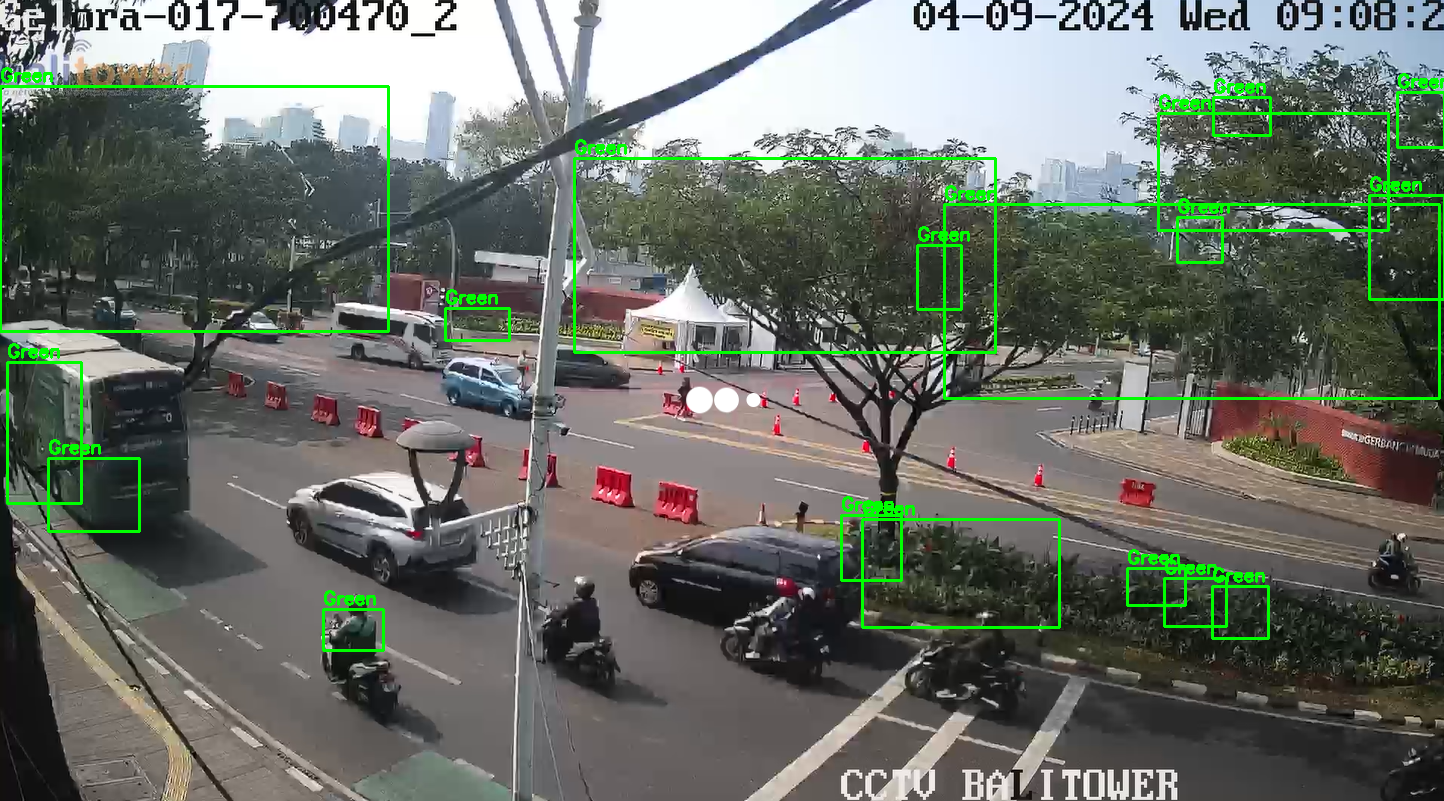

In [29]:
# Gabungkan semua mask warna yang dipilih
mask_total = None
for lower, upper in color_ranges[chosen_color]:
    lower_np = np.array(lower, dtype=np.uint8)
    upper_np = np.array(upper, dtype=np.uint8)
    mask = cv2.inRange(hsv, lower_np, upper_np)
    mask_total = mask if mask_total is None else cv2.bitwise_or(mask_total, mask)

# Temukan kontur
contours, _ = cv2.findContours(mask_total, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kotak jika ditemukan
output_image = image.copy()
margin = 8
found = False

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 300:
        found = True
        x, y, w, h = cv2.boundingRect(cnt)
        x_m = max(0, x - margin)
        y_m = max(0, y - margin)
        w_m = min(image.shape[1] - x_m, w + 2 * margin)
        h_m = min(image.shape[0] - y_m, h + 2 * margin)
        cv2.rectangle(output_image, (x_m, y_m), (x_m + w_m, y_m + h_m), draw_colors[chosen_color], 2)
        cv2.putText(output_image, chosen_color.capitalize(), (x_m, y_m - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, draw_colors[chosen_color], 2)

# Tampilkan hasil
if found:
    cv2_imshow(output_image)
else:
    print(f"Warna '{chosen_color}' tidak ditemukan dalam gambar.")